# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [20]:
# cities2 = ['touros', 'saint anthony', 'san patricio']

# set up lists to hold reponse info -- append to it in the loop below
name = []
lat = []
long = []
temp = []
wind = []
humid = []
clouds = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        print(f"Processing record: {city}.")
    except:
        # Append null values
        print(f"City: {city} was mot found. Skipping...")
#         print("City not found skipping")
        pass


Processing record: lavrentiya.
Processing record: yumen.
Processing record: vaini.
Processing record: killybegs.
Processing record: fort nelson.
Processing record: albany.
Processing record: asau.
Processing record: torbay.
Processing record: imbituba.
Processing record: ulladulla.
Processing record: buarcos.
Processing record: calabozo.
Processing record: grand island.
Processing record: saint-pierre.
Processing record: gilgit.
Processing record: puerto ayora.
Processing record: tynda.
Processing record: hobart.
Processing record: rikitea.
Processing record: plymouth.
Processing record: mumford.
Processing record: ushuaia.
Processing record: thompson.
Processing record: aksu.
Processing record: bredasdorp.
Processing record: severo-kurilsk.
City: barentsburg was mot found. Skipping...
Processing record: butaritari.
Processing record: hermanus.
Processing record: hilo.
Processing record: ridgecrest.
Processing record: marsabit.
Processing record: manta.
Processing record: mataura.
Proc

Processing record: nizwa.
Processing record: ponta delgada.
Processing record: jaguarao.
Processing record: zhangjiakou.
Processing record: iqaluit.
Processing record: san cristobal.
Processing record: gull lake.
Processing record: sitka.
Processing record: hualmay.
Processing record: mendi.
City: amderma was mot found. Skipping...
Processing record: phalaborwa.
Processing record: taoudenni.
City: samusu was mot found. Skipping...
Processing record: denpasar.
Processing record: paratinga.
Processing record: meulaboh.
Processing record: rosetta.
City: labutta was mot found. Skipping...
Processing record: la romana.
Processing record: vostok.
Processing record: digapahandi.
Processing record: show low.
Processing record: saint-philippe.
Processing record: vancouver.
Processing record: riyadh.
Processing record: saint george.
Processing record: san alberto.
Processing record: kumta.
Processing record: topolevo.
Processing record: cidreira.
Processing record: beba.
Processing record: san a

Processing record: marawi.
Processing record: nantucket.
City: zhanatas was mot found. Skipping...
Processing record: sukumo.
Processing record: vila franca do campo.
City: gumusyaka was mot found. Skipping...
Processing record: quatre cocos.
Processing record: along.
Processing record: sabang.
Processing record: maldonado.
Processing record: san ramon.
Processing record: krasnoselkup.
Processing record: loukhi.
Processing record: amur.
Processing record: havoysund.
Processing record: margate.
Processing record: turan.
Processing record: guararapes.
Processing record: pringsewu.
Processing record: edd.
Processing record: urazovo.
Processing record: pemangkat.
Processing record: kahului.
Processing record: jamame.
Processing record: soc trang.
Processing record: mineros.
Processing record: phek.
Processing record: bijawar.
Processing record: pochutla.
Processing record: boyabat.
Processing record: bahia blanca.
Processing record: bulnes.
Processing record: togur.
Processing record: sali

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create a data frame from cities, lat, and temp -- dictionary to a pd.DataFrame
weather_dict = {
    "city": name,
    "lat": lat,
    "lon": long,
    "temp": temp,
    "humidity": humid,
    "wind": wind,
    "cloudiness": clouds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(100)

,city,lat,lon,temp,humidity,wind,cloudiness
0,Lavrentiya,65.58,-171.00,61.03,61,16.44,92
1,Yumen,40.28,97.20,70.84,23,5.99,0
2,Vaini,-21.20,-175.20,71.60,88,8.05,40
3,Killybegs,54.63,-8.45,55.40,71,12.75,98
4,Fort Nelson,58.81,-122.70,73.40,49,2.24,75
...,...,...,...,...,...,...,...
95,Anadyr,64.75,177.48,66.20,77,11.18,31
96,Port-Cartier,50.03,-66.87,71.60,60,8.05,75
97,La Sarre,48.80,-79.20,79.95,81,6.71,13
98,Ciudad Bolivar,8.12,-63.55,90.18,53,2.86,87


In [22]:
weather_data.to_csv('Datafolder/weather_data_df.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
weather_data.dtypes

city           object
lat           float64
lon           float64
temp          float64
humidity        int64
wind          float64
cloudiness      int64
dtype: object

In [24]:
#  Get the indices of cities that have humidity over 100%.
ind_humidity = weather_data.index[weather_data["humidity"]>100]
ind_humidity

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
                            
# No observations with Humidity over 100

In [ ]:
# Extract relevant fields from the data frame
#no need as there was nothing cleaned up

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

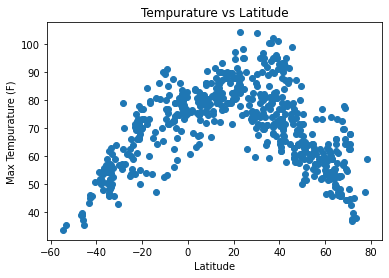

In [25]:
## Convert to floats and store Latitude and Tempurature as x and y values
x_values = weather_data['lat']
y_values = weather_data['temp']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Tempurature vs Latitude')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

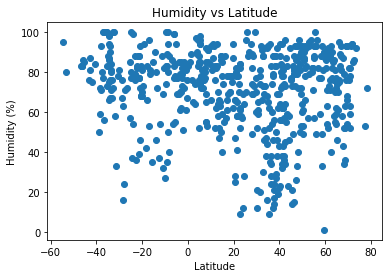

In [26]:
## Convert to floats and store Latitude and Humidty as x and y values
x_values = weather_data['lat']
y_values = weather_data['humidity']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

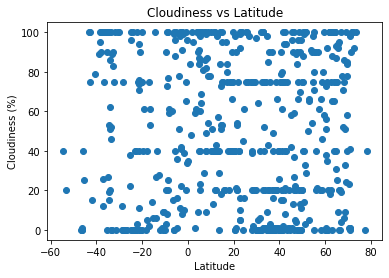

In [27]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = weather_data['lat']
y_values = weather_data['cloudiness']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

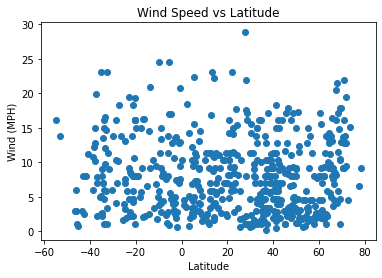

In [28]:
## Convert to floats and store Latitude and wind as x and y values
x_values = weather_data['lat']
y_values = weather_data['wind']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Wind Speed vs Latitude')

# Show plot
plt.show()

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.42310286549221493


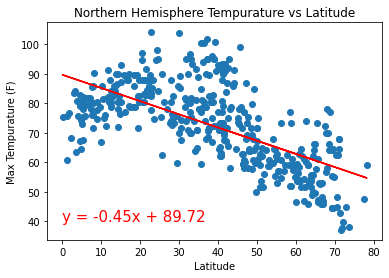

In [31]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Northern Hemisphere Tempurature vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.663589966132455


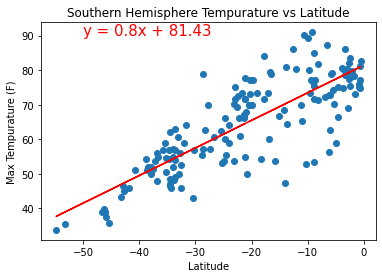

In [32]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Southern Hemisphere Tempurature vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 2.6745251058966804e-05


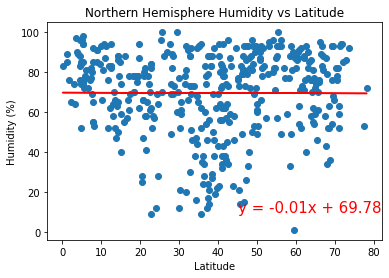

In [33]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.018078948230604915


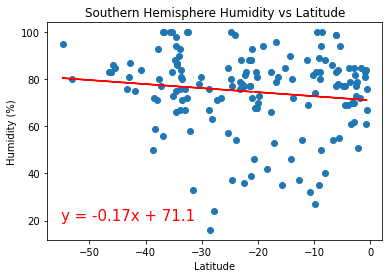

In [34]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.003345435743532496


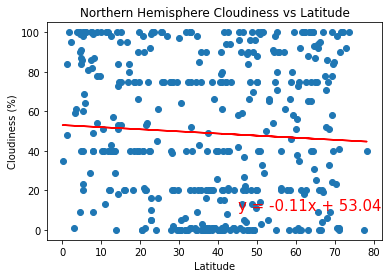

In [35]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0003578477470104781


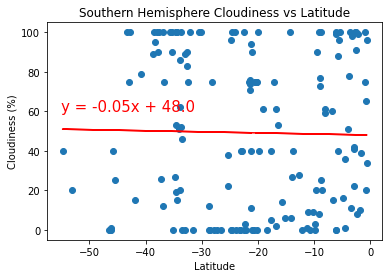

In [36]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.004347414431631111


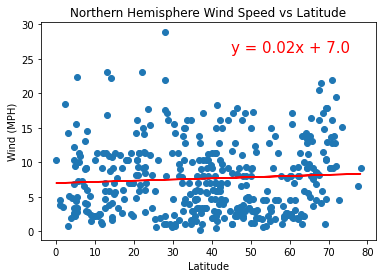

In [37]:
## Convert to floats and store Latitude and Wind as x and y values
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,26),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Northern Hemisphere Wind Speed vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 6.015230840826559e-06


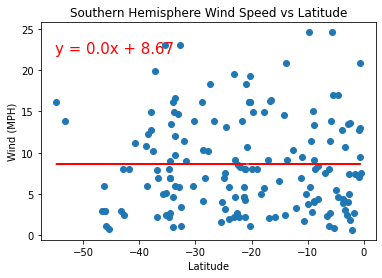

In [38]:
## Convert to floats and store Latitude and Wind as x and y values
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Southern Hemisphere Wind Speed vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()